In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [114]:
churn = pd.read_csv('churn_raw.csv')

In [115]:
churn

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [116]:
conditions = [
    churn.churn == True,
    churn.churn == False
]

choices = [
    1,
    0,
]

churn.churn = np.select(conditions, choices)

In [117]:
conditions = [
    churn['international plan'] == 'no',
    churn['international plan'] == 'yes'
]

choices = [
    0,
    1,
]

churn['international plan'] = np.select(conditions, choices)

In [118]:
churn['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [119]:
conditions = [
    churn['voice mail plan'] == 'no',
    churn['voice mail plan'] == 'yes'
]

choices = [
    0,
    1,
]

churn['voice mail plan'] = np.select(conditions, choices)

In [120]:
churn['voice mail plan'].value_counts()

0    2411
1     922
Name: voice mail plan, dtype: int64

In [121]:
churn['voice mail plan']

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [122]:
churn.drop('phone number', axis = 1, inplace = True)

In [123]:
churn.dtypes

state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [124]:
churn

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [125]:
churn['voice mail plan'].value_counts()

0    2411
1     922
Name: voice mail plan, dtype: int64

In [126]:
churn[churn['voice mail plan'] == 0]['churn'].mean()

0.1671505599336375

In [127]:
churn[churn['voice mail plan'] == 1]['churn'].mean()

0.08676789587852494

In [128]:
churn[churn['international plan'] == 1]['churn'].mean()

0.4241486068111455

In [129]:
churn[churn['international plan'] == 0]['churn'].mean()

0.11495016611295682

In [130]:
churn[churn['international plan'] == 1]['churn'].sum()

137

In [131]:
churn[churn['international plan'] == 1]['churn'].count()

323

In [132]:
churn[churn['international plan'] == 0]['churn'].sum()

346

In [133]:
churn[churn['international plan'] == 0]['churn'].count()

3010

In [134]:
count = np.array([137, 346])

In [135]:
nobs =np.array([323,3010])

In [136]:
stat, pval = proportions_ztest(count, nobs)

In [137]:
stat

15.001803255009364

In [138]:
pval

7.145140406313257e-51

In [139]:
churn[(churn['international plan'] == 1) & (churn['churn'] == 1)]['account length'].mean()

104.9051094890511

In [140]:
churn[(churn['international plan'] == 1) & (churn['churn'] == 0)]['account length'].mean()

103.45698924731182

In [141]:
churn['international plan'].value_counts()

0    3010
1     323
Name: international plan, dtype: int64

In [142]:
churn.state.value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [143]:
state_list = churn.state.unique()

In [144]:
state_list = state_list.tolist()

In [145]:
type(state_list)

list

In [146]:
top_states = ['DC', 'MD', 'NJ', 'HI', 'MA', 'CT', 'CA', 'NH', 'AK', 'WA', 'VA', 'CO', 'UT', 'MN', 'NY', 'IL', 'DE', 'RI', 'ND', 'OR', 'WY', 'PA', 'VT', 'WI', 'TX']


In [147]:
len(top_states)

25

In [148]:
churn['top income states'] = np.where(churn.state.isin(top_states), 1, 0)

In [149]:
churn[churn['top income states'] == 1]['churn'].mean()

0.1472915398660986

In [150]:
churn[churn['top income states'] == 0]['churn'].mean()

0.142603550295858

In [151]:
churn.head(100)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,top income states
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0
5,AL,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0
6,MA,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1
7,MO,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,0
8,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
9,WV,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,0


In [152]:
low_col_states = ['MS', 'AR', 'OK', 'MO', 'NM', 'TN', 'MI', 'KS', 'GA', 'WY', 'AL', 'IN', 'IA', 'OH', 'NE', 'KY', 'WV', 'TX', 'ID', 'LA', 'IL', 'NC', 'SC', 'AZ', 'WI']

In [153]:
len(low_col_states)

25

In [154]:
churn['low col'] = np.where(churn.state.isin(low_col_states), 1, 0)

In [155]:
churn['low col']

0       1
1       1
2       0
3       1
4       1
       ..
3328    1
3329    1
3330    0
3331    0
3332    1
Name: low col, Length: 3333, dtype: int64

In [156]:
churn.corr()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,top income states,low col
account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.015306,-0.018708
area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.024205,0.003936
international plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852,0.036063,-0.011121
voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148,-0.028842,0.009262
number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,-0.029013,0.007938
total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.005653,-0.011820
total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,-0.037257,0.053218
total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.005653,-0.011824
total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,-0.001261,-0.011236
total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,-0.035484,0.027766


In [157]:
churn[churn['low col'] == 1]['churn'].mean()

0.13466183574879226

In [158]:
churn[churn['low col'] == 0]['churn'].mean()

0.15503875968992248

In [159]:
churn['top qol'] = churn['low col'] * churn['top income states']

In [160]:
churn[churn['top qol'] == 0]['churn'].mean()

0.14566929133858267

In [161]:
churn[churn['top qol'] == 1]['churn'].sum()

39

In [162]:
churn[churn['top qol'] == 1]['churn'].count()

285

In [163]:
churn[churn['top qol'] == 0]['churn'].sum()

444

In [164]:
churn[churn['top qol'] == 0]['churn'].count()

3048

In [165]:
count = np.array([39, 444])
nobs = np.array([285, 3048])

In [166]:
stat, pval = proportions_ztest(count, nobs)

In [167]:
pval

0.6856016764928314

In [168]:
stat

-0.40483108673001705

In [169]:
churn['top qol'].value_counts()

0    3048
1     285
Name: top qol, dtype: int64

In [170]:
t_state = churn.state.value_counts().iloc[0:27]

In [171]:
t_state.index

Index(['WV', 'MN', 'NY', 'AL', 'OR', 'OH', 'WI', 'VA', 'WY', 'CT', 'MI', 'ID',
       'VT', 'TX', 'UT', 'IN', 'MD', 'KS', 'MT', 'NJ', 'NC', 'CO', 'WA', 'NV',
       'MS', 'MA', 'RI'],
      dtype='object')

In [172]:
l_state = churn.state.value_counts().iloc[27:]

In [173]:
churn['top user states'] = np.where(churn.state.isin(t_state.index), 1, 0)

In [174]:
churn['top user states'].value_counts()

1    1986
0    1347
Name: top user states, dtype: int64

In [175]:
churn[churn['top user states'] == 1]['churn'].mean()

0.15760322255790535

In [176]:
churn[churn['top user states'] == 0]['churn'].mean()

0.12620638455827765

In [177]:
churn[churn['top user states'] == 1]['churn'].sum()

313

In [178]:
churn[churn['top user states'] == 1]['churn'].count()

1986

In [179]:
churn[churn['top user states'] == 0]['churn'].sum()

170

In [180]:
churn[churn['top user states'] == 0]['churn'].count()

1347

In [181]:
count = np.array([313, 170])
nobs = np.array([1986, 1347])

stat, pval = proportions_ztest(count, nobs)

In [182]:
stat

2.5268589114474382

In [183]:
pval

0.011508772655468905

In [184]:
churn.state.value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [185]:
churn

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,top income states,low col,top qol,top user states
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1,0,1
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1,0,1
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,0,1
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,0,1
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,1,0,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,1,0,1
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,1,0,0,1
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1,0,0,1


In [186]:
churn.drop(['state', 'top qol', 'low col', 'top income states'], axis = 1, inplace=True)

In [187]:
churn

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,top user states
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,1
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,1
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1


## Is Area Code An Important Feature? Let's Run a One-Way ANOVA and Find Out.

## Ho: µ_first_ac = µ_second_ac = µ_third_ac 
## Ha: µ_first_ac ≠ µ_second_ac ≠ µ_third_ac 

In [188]:
first_ac = churn[churn['area code'] == 415]['churn']

In [189]:
second_ac = churn[churn['area code'] == 510]['churn']

In [190]:
third_ac = churn[churn['area code'] == 408]['churn']

In [191]:
stats.f_oneway(first_ac,second_ac,third_ac)


F_onewayResult(statistic=0.0886951688589008, pvalue=0.9151266513306314)

## With a threshold of .05, our F-statistic of .089 and a P-value of .915 means that I have failed to reject the null hypothesis that the difference in churn rate for each area code is not statistically significant. As a result, I have determined that area code is not an important feature and I will be dropping it from the dataset.

In [192]:
churn.drop('area code', axis = 1, inplace = True)

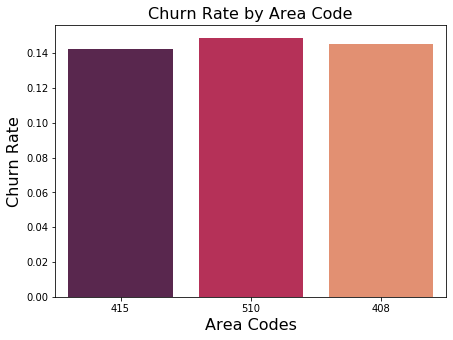

In [193]:

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x = ['415','510','408'],y=[first_ac.mean(), second_ac.mean(), third_ac.mean()],order = ['415', '510', '408'],palette ='rocket', ax=ax)
ax.set_xlabel("Area Codes", fontsize=16)
ax.set_ylabel("Churn Rate", fontsize=16)
ax.set_title('Churn Rate by Area Code', fontsize=16)
fig.savefig("Churn Rate by Area Code.png")
ax;

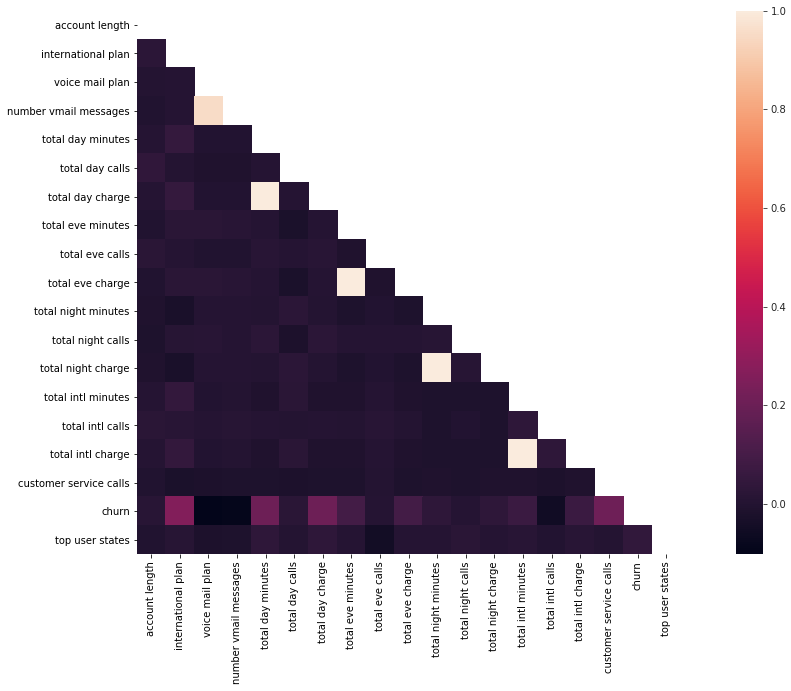

In [194]:
fig, ax = plt.subplots(figsize=(20, 10))
mask = np.zeros_like(churn.corr()) #heat map of correlations
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(churn.corr(), mask=mask, square=True)

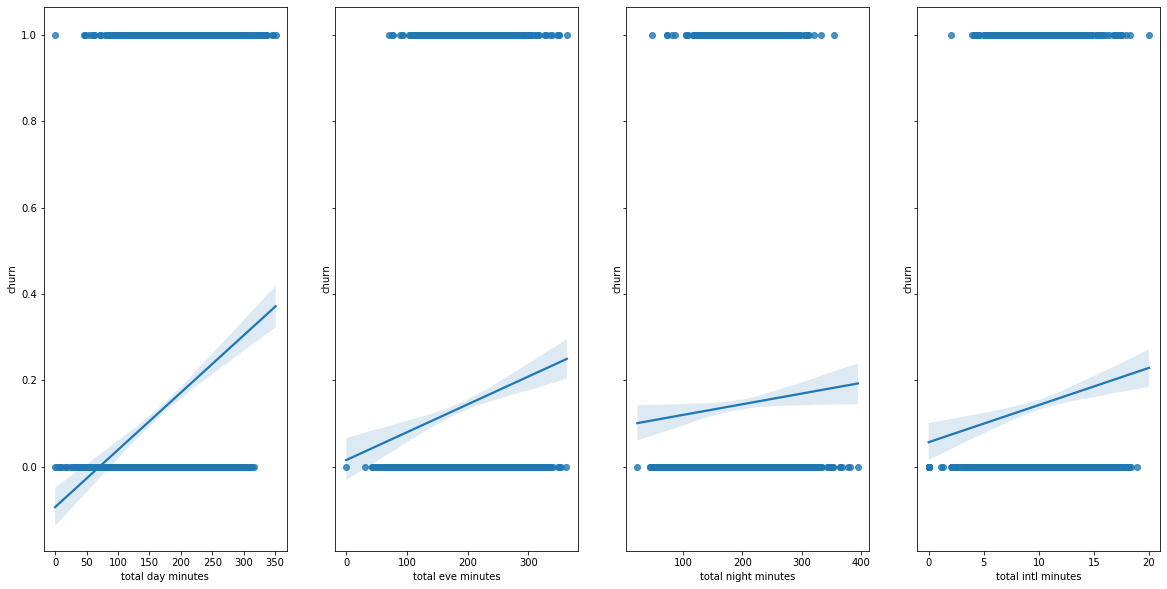

In [201]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (20,10),ncols=4, sharey = True)
sns.regplot(x=churn['total day minutes'], y=churn.churn, ax=ax1)
sns.regplot(x=churn['total eve minutes'],  y=churn.churn, ax=ax2)
sns.regplot(x=churn['total night minutes'],  y=churn.churn, ax=ax3) 
sns.regplot(x=churn['total intl minutes'],  y=churn.churn, ax=ax4)
ax;

In [89]:
churn['total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64

In [90]:
churn['total night minutes'].describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: total night minutes, dtype: float64

In [91]:
churn['total intl minutes'].describe()


count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: total intl minutes, dtype: float64

In [92]:
churn['total eve minutes'].describe()

count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: total eve minutes, dtype: float64

In [93]:
night = churn[churn['total night minutes']<=166]['churn']

In [94]:
eve = churn[churn['total eve minutes']<=166]['churn']

In [95]:
day = churn[churn['total day minutes']<=166]['churn']


In [96]:
night

2       0
12      0
15      1
16      0
17      0
       ..
3302    0
3307    0
3314    0
3320    1
3331    0
Name: churn, Length: 811, dtype: int64

In [97]:
day

1       0
7       0
10      1
12      0
13      0
       ..
3320    1
3323    1
3326    0
3327    0
3328    0
Name: churn, Length: 1343, dtype: int64

In [98]:
eve

2       0
3       0
4       0
7       0
11      0
       ..
3315    0
3321    0
3325    0
3329    0
3331    0
Name: churn, Length: 828, dtype: int64

In [99]:
stats.f_oneway(night,eve,day)

F_onewayResult(statistic=1.0180536032665357, pvalue=0.361423149212098)

In [100]:
churn.drop(['total eve minutes', 'total day minutes', 'total night minutes', 'total intl minutes', 'voice mail plan'], axis = 1, inplace=True)

In [101]:
churn

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,top user states
0,128,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,1
3,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,1
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0,0
3329,68,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0,1
3330,28,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0,1
3331,184,1,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0,1


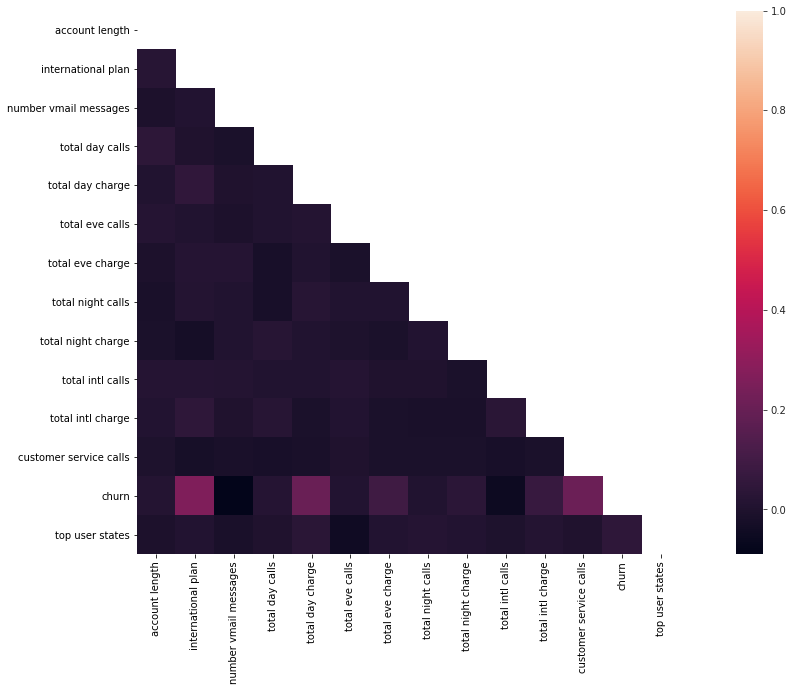

In [102]:
fig, ax = plt.subplots(figsize=(20, 10))
mask = np.zeros_like(churn.corr()) #heat map of correlations
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(churn.corr(), mask=mask, square=True)

In [104]:
churn.to_csv('churn.csv')